In [2]:
import sys
import folium
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from folium.plugins import HeatMap

df = pd.read_csv('../data/trip_path_mbike_start_20190114.csv')
print("DF size is " + str(len(df.index)))
df.head(5)

DF size is 1851924


,Coords_Latitude,Coords_Longitude,Trip_ID,Bike_Event,User_ID,Date_Time
0,38.978141,-76.928956,Hf3aj78RcGaJJMGRn,StartTrip,24Tswou857XKT9R65,2017-06-14T19:02:21.593Z
1,38.978200,-76.928471,tp7QKuiJX9DvLKDcf,StartTrip,24Tswou857XKT9R65,2017-06-15T20:07:14.437Z
2,38.972647,-76.938315,tp7QKuiJX9DvLKDcf,EndTripInsideGeofence,24Tswou857XKT9R65,2017-06-15T20:19:43.891Z
3,38.978369,-76.928679,j7xEWoy65rDsJfk7M,StartTrip,24Tswou857XKT9R65,2017-06-17T22:25:55.592Z
4,38.972581,-76.938422,j7xEWoy65rDsJfk7M,EndTripInsideGeofence,24Tswou857XKT9R65,2017-06-17T22:36:07.021Z


StartTrip                   77718
AttemptLock                 75120
Unlock                      59150
EndTripInsideGeofence       58735
AccessCode                  58131
Lock                        51688
AttemptUnlock               26344
KeypadAccessCodeShown       12687
EndTripStoppedByGeofence    10931
EndTripBypassGeofence       10093
Name: Bike_Event, dtype: int64

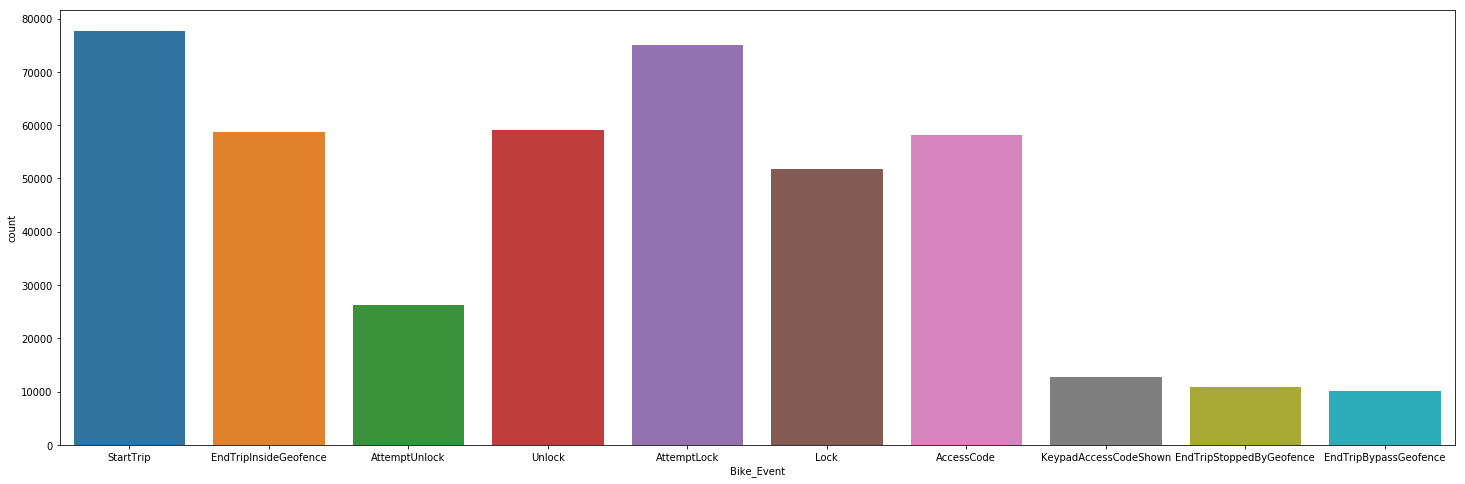

In [3]:
#Counts, not including background/foreground
plt.rcParams['figure.figsize'] = [25, 8]
#Remove uncommon events + Background & Foregroud
dfx = df[(df['Bike_Event'] != 'Background') & (df['Bike_Event'] != 'Foreground')]
dfx = dfx[(dfx['Bike_Event'] != 'EndTripGeofenceDisabled') & (dfx['Bike_Event'] != 'AccessCodeBLEFallback')]
dfx = dfx[(dfx['Bike_Event'] != 'SentrilockAccessCodeShown') & (dfx['Bike_Event'] != 'OnHold')]
#colss = [i[:] for i in dfx.columns]
#dfx.columns = colss
sns.countplot(dfx.Bike_Event)
dfx.Bike_Event.value_counts()

In [4]:
df = df[(df['Bike_Event'] == 'StartTrip') | (df['Bike_Event'] == 'EndTripInsideGeofence')]
print("Only %s are Start/End trip events." % str(len(df.index)))

dfStart = df[df['Bike_Event'] == 'StartTrip']
dfEnd = df[df['Bike_Event'] == 'EndTripInsideGeofence']
df[df['Trip_ID']== 'L3QADAJtdmgLdenDj']
#print(df[df['Trip_ID'] == 'L3QADAJtdmgLdenDj'])

Only 136453 are Start/End trip events.


,Coords_Latitude,Coords_Longitude,Trip_ID,Bike_Event,User_ID,Date_Time
54191,38.992974,-76.937454,L3QADAJtdmgLdenDj,StartTrip,36xxpQuhZWX7oAwdD,2017-07-20T13:46:48.005Z
54194,38.993227,-76.941564,L3QADAJtdmgLdenDj,EndTripInsideGeofence,36xxpQuhZWX7oAwdD,2017-07-20T14:35:43.494Z
54195,38.993227,-76.941564,L3QADAJtdmgLdenDj,EndTripInsideGeofence,36xxpQuhZWX7oAwdD,2017-07-20T14:35:43.529Z
54196,38.993227,-76.941564,L3QADAJtdmgLdenDj,EndTripInsideGeofence,36xxpQuhZWX7oAwdD,2017-07-20T14:35:43.531Z
54197,38.993227,-76.941564,L3QADAJtdmgLdenDj,EndTripInsideGeofence,36xxpQuhZWX7oAwdD,2017-07-20T14:35:43.573Z
54198,38.993227,-76.941564,L3QADAJtdmgLdenDj,EndTripInsideGeofence,36xxpQuhZWX7oAwdD,2017-07-20T14:35:43.598Z
54199,38.993227,-76.941564,L3QADAJtdmgLdenDj,EndTripInsideGeofence,36xxpQuhZWX7oAwdD,2017-07-20T14:35:43.601Z
54200,38.993227,-76.941564,L3QADAJtdmgLdenDj,EndTripInsideGeofence,36xxpQuhZWX7oAwdD,2017-07-20T14:35:43.603Z
54201,38.993227,-76.941564,L3QADAJtdmgLdenDj,EndTripInsideGeofence,36xxpQuhZWX7oAwdD,2017-07-20T14:35:43.688Z
54202,38.993227,-76.941564,L3QADAJtdmgLdenDj,EndTripInsideGeofence,36xxpQuhZWX7oAwdD,2017-07-20T14:35:43.691Z


In [5]:
dfz = df.copy()
dfz['Coords_Latitude'] = dfz['Coords_Latitude'].astype('float')
dfz['Coords_Longitude'] = dfz['Coords_Longitude'].astype('float')
print("Range Latitutde: " + str(dfz['Coords_Latitude'].max() - dfz['Coords_Latitude'].min()))
print("Range Longonitude: " + str(dfz['Coords_Longitude'].max() - dfz['Coords_Longitude'].min()))
print(dfz['Coords_Longitude'].max(), dfz['Coords_Longitude'].min())
print(dfz['Coords_Latitude'].max(), dfz['Coords_Latitude'].min())
print("Variance: " + str(dfz['Coords_Longitude'].var()))

Range Latitutde: 3.62778724154537
Range Longonitude: 243.934875
126.934875 -117.0
39.713754941545375 36.085967700000005
Variance: 0.9574997201921622


# Clean Data
Clearly something is wrong with our data, since a Longitude of 126 is on the other side of the earth.
So, we're going to pick opposite corners of a square to define College Park and its surrounding region, and remove anything outside of this. We'll remove all events outside of the box made by these corners.


In [6]:
# (Botoom right corner - East riverdale/highway) [BR]
# (Top Left corner - Adelphi) [TL] 
LatTL, LongTL = [38.998028, -76.962679]
LatBR, LongBR = [38.953989,-76.906056]
dfz = dfz[(dfz['Coords_Latitude'] <= LatTL) & (dfz['Coords_Latitude'] >= LatBR)]
dfz = dfz[(dfz['Coords_Longitude'] >= LongTL) & (dfz['Coords_Longitude'] <= LongBR)]
#Check the min/max to make sure they're reasonable now:
print(dfz['Coords_Longitude'].min(), dfz['Coords_Latitude'].max())

-76.96218583365523 38.9980096


/home/luc/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


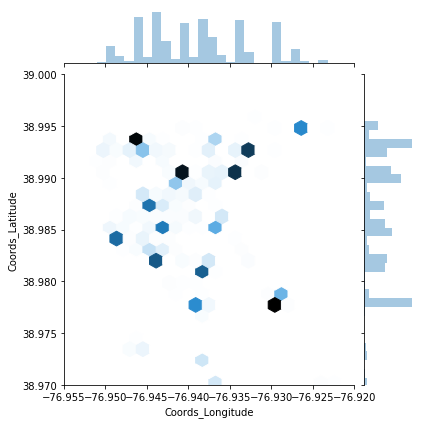

In [7]:
g = sns.jointplot("Coords_Longitude", "Coords_Latitude", data=dfz[dfz['Bike_Event']=='StartTrip'], xlim=[-76.955, -76.920], ylim=[38.97,39],kind="hex",joint_kws=dict(gridsize=35))

*This shows usage by binning lat, longitude into hexagons. The darker the hexagon, the higher the sum of all start & end trip events that occured in that bin.*  (Start Trip)

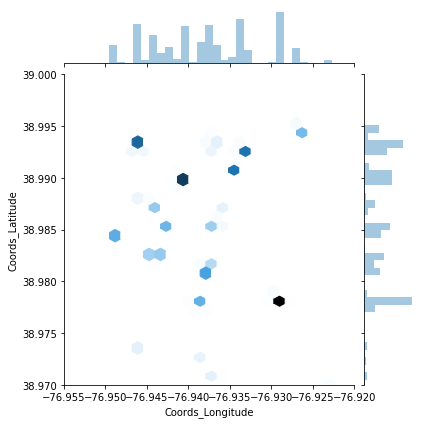

In [8]:
g = sns.jointplot("Coords_Longitude", "Coords_Latitude", data=dfz[dfz['Bike_Event']=='EndTripInsideGeofence'], xlim=[-76.955, -76.920], ylim=[38.97,39], kind='hex', joint_kws= dict(gridsize=35))

*This shows usage by binning lat, longitude into hexagons. The darker the hexagon, the higher the sum of all start & end trip events that occured in that bin.*  (End Trip)

In [14]:
dfStartss = dfz[dfz['Bike_Event'] == 'StartTrip']
#Trick to render bigger maps
def embed_map(m):
    from IPython.display import IFrame

    m.save('index.html')
    return IFrame('index.html', width='100%', height='750px')

map_CP = folium.Map(location=[dfStartss.Coords_Latitude.mean(), dfStartss.Coords_Longitude.mean()], zoom_start=15)
mc = folium.plugins.MarkerCluster()

for i in range (0,100000):
    lat = dfz.Coords_Latitude.iloc[i]
    long = dfz.Coords_Longitude.iloc[i]
    mc.add_child(folium.Marker([lat,long]))#.add_to(map_CP)

map_CP.add_child(mc)
embed_map(map_CP)


In [16]:
map_CP = folium.Map(location=[dfz.Coords_Latitude.mean(), dfz.Coords_Longitude.mean()], zoom_start=15)
mc = folium.plugins.MarkerCluster()
dfSample = dfz.sample(10000)
for i in range (0,10000):
    lat = dfSample.Coords_Latitude.iloc[i]
    long = dfSample.Coords_Longitude.iloc[i]
    mc.add_child(folium.Marker([lat,long]))#.add_to(map_CP)

map_CP.add_child(mc)


In [11]:
'''import matplotlib.pyplot as plt
import numpy as np
x = dfz['Coords_Longitude'].values
y = dfz['Coords_Latitude'].values
plt.hexbin(x, y)
plt.show()'''

"import matplotlib.pyplot as plt\nimport numpy as np\nx = dfz['Coords_Longitude'].values\ny = dfz['Coords_Latitude'].values\nplt.hexbin(x, y)\nplt.show()"

In [14]:
len(dfz['Coords_Latitude'].unique())

97037

In [15]:
len(dfz['Coords_Longitude'].unique())

88604

In [55]:
def getDist(long1,lat1,long2,lat2):
    return np.sqrt((long1-long2)**2 + (lat1-lat2)**2)

def getClosestStation(row,dfStations):
    long = row['Coords_Longitude']
    lat = row['Coords_Latitude']
    shortestDist = sys.float_info.max
    for i in range (0,len(dfStations.index)):
        d = getDist(long,lat,dfStations.iloc[i].Longitude,dfStations.iloc[i].Latitude)
        if (d < shortestDist): 
            shortestDist = d
            longF = dfStations.iloc[i].Longitude
            latF = dfStations.iloc[i].Latitude
            stationName = dfStations.iloc[i].Name
    return pd.Series([latF,longF, stationName])

In [56]:
import sys
import numpy as np
dfStations = pd.read_csv('../data/stationsInfo.csv')
df_withStation = dfz.iloc[:1000].copy()

print(len(df_withStation.index))
df_withStation['StationName'] = None
df_withStation[['Coords_Latitude','Coords_Longitude','StationName']] = df_withStation.apply(getClosestStation,args=(dfStations,), axis=1)

df_withStation 

1000


,Coords_Latitude,Coords_Longitude,Trip_ID,Bike_Event,User_ID,Date_Time,StationName
0,38.978129,-76.929079,Hf3aj78RcGaJJMGRn,StartTrip,24Tswou857XKT9R65,2017-06-14T19:02:21.593Z,College Park Metro West
1,38.978129,-76.929079,tp7QKuiJX9DvLKDcf,StartTrip,24Tswou857XKT9R65,2017-06-15T20:07:14.437Z,College Park Metro West
2,38.972794,-76.938213,tp7QKuiJX9DvLKDcf,EndTripInsideGeofence,24Tswou857XKT9R65,2017-06-15T20:19:43.891Z,Queens Chapel
3,38.978129,-76.929079,j7xEWoy65rDsJfk7M,StartTrip,24Tswou857XKT9R65,2017-06-17T22:25:55.592Z,College Park Metro West
4,38.972794,-76.938213,j7xEWoy65rDsJfk7M,EndTripInsideGeofence,24Tswou857XKT9R65,2017-06-17T22:36:07.021Z,Queens Chapel
5,38.972794,-76.938213,YsPoSKbfooMuwpfTR,StartTrip,24Tswou857XKT9R65,2017-06-22T11:09:32.494Z,Queens Chapel
6,38.978129,-76.929079,YsPoSKbfooMuwpfTR,EndTripInsideGeofence,24Tswou857XKT9R65,2017-06-22T11:15:14.979Z,College Park Metro West
7,38.978129,-76.929079,s4RaLMLAmbQ6kQDkw,StartTrip,24Tswou857XKT9R65,2017-06-22T17:10:02.014Z,College Park Metro West
8,38.972794,-76.938213,s4RaLMLAmbQ6kQDkw,EndTripInsideGeofence,24Tswou857XKT9R65,2017-06-22T17:19:45.178Z,Queens Chapel
9,38.978129,-76.929079,neK2FmGgoafPrems7,StartTrip,24Tswou857XKT9R65,2017-06-23T19:10:43.815Z,College Park Metro West


1000
